# 4. Testing CNN Accuracy

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels
import matplotlib
import matplotlib.pyplot as plt
from keras.models import load_model

Using TensorFlow backend.


In [2]:
sims = np.load('all_sims_recomb.npz')
xtest,ytest = sims['xtest'],sims['ytest']
del sims

In [3]:
model = load_model('hyde_cnn_all-sims.mdl')
pred = model.predict(xtest)
pred_cat = [i.argmax() for i in pred]

W0719 09:05:15.614152 140093744490304 deprecation_wrapper.py:119] From /home/paulblischak/miniconda3/envs/cnn/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 09:05:15.624745 140093744490304 deprecation_wrapper.py:119] From /home/paulblischak/miniconda3/envs/cnn/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 09:05:15.652168 140093744490304 deprecation_wrapper.py:119] From /home/paulblischak/miniconda3/envs/cnn/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0719 09:05:15.654255 140093744490304 deprecation_wrapper.py:119] From /home/paulblischak/miniconda3/envs/cnn/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprec

In [4]:
print(classification_report([np.argmax(ytest[i,:]) for i in range(ytest.shape[0])],
                      pred_cat, target_names=['no_hyb','one_hyb','hyb_mig','two_hyb']))

              precision    recall  f1-score   support

      no_hyb       0.98      1.00      0.99      7548
     one_hyb       0.96      0.98      0.97      7450
     hyb_mig       1.00      1.00      1.00      7467
     two_hyb       1.00      0.96      0.98      7535

    accuracy                           0.98     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000



In [13]:
print(classification_report([np.argmax(ytest2[i,:]) for i in range(ytest2.shape[0])],
                      pred_cat2, target_names=['no_hyb','one_hyb','two_hyb']))

              precision    recall  f1-score   support

      no_hyb       0.98      1.00      0.99      7391
     one_hyb       0.96      0.98      0.97      7608
     two_hyb       1.00      0.96      0.98      7501

    accuracy                           0.98     22500
   macro avg       0.98      0.98      0.98     22500
weighted avg       0.98      0.98      0.98     22500



In [7]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on the bottom.
    ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

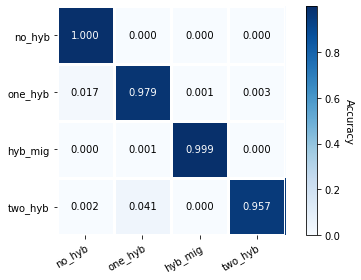

In [9]:
fig, ax = plt.subplots()
cm = np.array(confusion_matrix([np.argmax(ytest[i,:]) for i in range(ytest.shape[0])],pred_cat))
cm_norm = [cm[i,:]/np.sum(cm[i,:]) for i in range(cm.shape[0])]
im, cbar = heatmap(np.array(cm_norm), ['no_hyb','one_hyb','hyb_mig','two_hyb'],
                   ['no_hyb','one_hyb', 'hyb_mig','two_hyb'], ax=ax,
                   cmap="Blues", cbarlabel="Accuracy")
texts = annotate_heatmap(im, valfmt="{x:.3f}")
fig.tight_layout()
plt.savefig("all-sims_confusion-matrix.svg")
plt.show()